In [57]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, Flatten, Add, Input, Activation
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy

from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image

import matplotlib.pyplot as plt

In [34]:
metadata_test = pd.read_csv('test_metadata.csv')
metadata_val = pd.read_csv('val_metadata.csv')
new_metadata_train = pd.read_csv('train_metadata.csv')

In [35]:
# double checking which values should be cleaned or filled
missing_values = metadata_val['clin_size_long_diam_mm'].isna().sum()
print(f"Missing values in 'clin_size_long_diam_mm' for meta val data: {missing_values}")

missing_values = metadata_val['age_approx'].isna().sum()
print(f"Missing values in 'age_approx' for meta val data: {missing_values}")

missing_values = metadata_val['sex'].isna().sum()
print(f"Missing values in 'sex' for new meta val data: {missing_values}")

missing_values = metadata_val['diagnosis_1'].isna().sum()
print(f"Missing values in 'diagnosis_1' for meta val data: {missing_values}")

print(f'values in meta val data: {len(new_metadata_train)}')

Missing values in 'clin_size_long_diam_mm' for meta val data: 18574
Missing values in 'age_approx' for meta val data: 945
Missing values in 'sex' for new meta val data: 2760
Missing values in 'diagnosis_1' for meta val data: 0
values in meta val data: 349531


In [36]:
missing_values = new_metadata_train['clin_size_long_diam_mm'].isna().sum()
print(f"Missing values in 'clin_size_long_diam_mm' for new meta train data: {missing_values}")

missing_values = new_metadata_train['age_approx'].isna().sum()
print(f"Missing values in 'age_approx' for new meta train data: {missing_values}")

missing_values = new_metadata_train['sex'].isna().sum()
print(f"Missing values in 'sex' for new meta train data: {missing_values}")

missing_values = new_metadata_train['diagnosis_1'].isna().sum()
print(f"Missing values in 'diagnosis_1' for new meta train data: {missing_values}")

print(f'values in new meta train data: {len(new_metadata_train)}')

Missing values in 'clin_size_long_diam_mm' for new meta train data: 65517
Missing values in 'age_approx' for new meta train data: 3398
Missing values in 'sex' for new meta train data: 9608
Missing values in 'diagnosis_1' for new meta train data: 0
values in new meta train data: 349531


In [37]:
#filling in missing values for clin_size_long_diam_mm

meanTestVal = metadata_test['clin_size_long_diam_mm'].mean()
metadata_test['clin_size_long_diam_mm'] = metadata_test['clin_size_long_diam_mm'].fillna(meanTestVal)

meanTrainVal = new_metadata_train['clin_size_long_diam_mm'].mean()
new_metadata_train['clin_size_long_diam_mm'] = new_metadata_train['clin_size_long_diam_mm'].fillna(meanTrainVal)

meanValidationVal = metadata_val['clin_size_long_diam_mm'].mean()
metadata_val['clin_size_long_diam_mm'] = metadata_val['clin_size_long_diam_mm'].fillna(meanValidationVal)

meanTrainVal = new_metadata_train['clin_size_long_diam_mm'].mean()
new_metadata_train['clin_size_long_diam_mm'] = new_metadata_train['clin_size_long_diam_mm'].fillna(meanTrainVal)
new_metadata_train.head()

,age_approx,clin_size_long_diam_mm,sex,diagnosis_1
0,45.0,2.60,1.0,0.0
1,70.0,4.32,0.0,0.0
2,40.0,2.62,0.0,0.0
3,65.0,6.20,1.0,0.0
4,85.0,5.07,1.0,0.0


In [38]:
metadata_test.head()

,age_approx,clin_size_long_diam_mm,sex,diagnosis_1
0,55.0,2.88,1.0,0.0
1,50.0,2.96,1.0,0.0
2,55.0,4.97,0.0,0.0
3,50.0,3.84,0.0,0.0
4,75.0,2.82,0.0,0.0


In [39]:
# drop rows with missing values

metadata_test.dropna(subset=['age_approx', 'sex', 'diagnosis_1'], inplace=True)

new_metadata_train.dropna(subset=['age_approx', 'sex', 'diagnosis_1'], inplace=True)

metadata_val.dropna(subset=['age_approx', 'sex', 'diagnosis_1'], inplace=True)

In [40]:
missing_values = new_metadata_train['clin_size_long_diam_mm'].isna().sum()
print(f"Missing values in 'clin_size_long_diam_mm' for new meta train data: {missing_values}")

missing_values = new_metadata_train['age_approx'].isna().sum()
print(f"Missing values in 'age_approx' for new meta train data: {missing_values}")

missing_values = new_metadata_train['sex'].isna().sum()
print(f"Missing values in 'sex' for new meta train data: {missing_values}")

missing_values = new_metadata_train['diagnosis_1'].isna().sum()
print(f"Missing values in 'diagnosis_1' for new meta train data: {missing_values}")

print(f'values in new meta train data: {len(new_metadata_train)}')

Missing values in 'clin_size_long_diam_mm' for new meta train data: 0
Missing values in 'age_approx' for new meta train data: 0
Missing values in 'sex' for new meta train data: 0
Missing values in 'diagnosis_1' for new meta train data: 0
values in new meta train data: 338456


In [41]:
metadata_X_test = metadata_test.iloc[:, :-1]
metadata_Y_test = metadata_test.iloc[:, -1]
metadata_X_val = metadata_val.iloc[:, :-1]
metadata_Y_val = metadata_val.iloc[:, -1]

new_metadata_X_train = new_metadata_train.iloc[:, :-1]
new_metadata_Y_train = new_metadata_train.iloc[:, -1]

In [42]:
new_metadata_X_train.head()

,age_approx,clin_size_long_diam_mm,sex
0,45.0,2.60,1.0
1,70.0,4.32,0.0
2,40.0,2.62,0.0
3,65.0,6.20,1.0
4,85.0,5.07,1.0


In [43]:
new_metadata_Y_train.head()

,diagnosis_1
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [44]:
numberOfColumns = 3 #age, diameter, sex
inputs = Input(shape=(numberOfColumns,))

x = Dense(64, activation="relu")(inputs)  # First Dense layer
x = Dense(32, activation="relu")(x)       # Second Dense layer

# residual block
residual_input = x # Save input for the residual connection

# dense layers inside the residual block
xRes = Dense(16, activation="relu")(x)
xRes = Dense(16, activation="relu")(xRes)

# ensures residual input will match same dimensions as the output of our residual block
if residual_input.shape[-1] != xRes.shape[-1]:
    residual_input = Dense(16)(residual_input)


# adding the residual input to the output
xRes = Add()([xRes, residual_input])

# skip connection
skip_connection = Dense(16)(inputs)

xSkip = Add()([xRes, skip_connection])  # combine residual block output with skip connection


# final layers
x = Dense(16, activation="relu")(xSkip)
x = Dense(16, activation="relu")(x)

output = Dense(1, activation="sigmoid")(x)

In [45]:
model = Model(inputs=inputs, outputs=output)

In [46]:
model.compile(optimizer="adam", loss=BinaryCrossentropy(), metrics=["accuracy"])

In [47]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │        256 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 32)        │      2,080 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 16)        │        528 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 16)        │        272 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 16)        │        528 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 16)        │          0 │ dense_12[0][0],   │
│                     │                   │            │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 16)        │         64 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 16)        │          0 │ add_2[0][0],      │
│                     │                   │            │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 16)        │        272 │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 16)        │        272 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 1)         │         17 │ dense_16[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

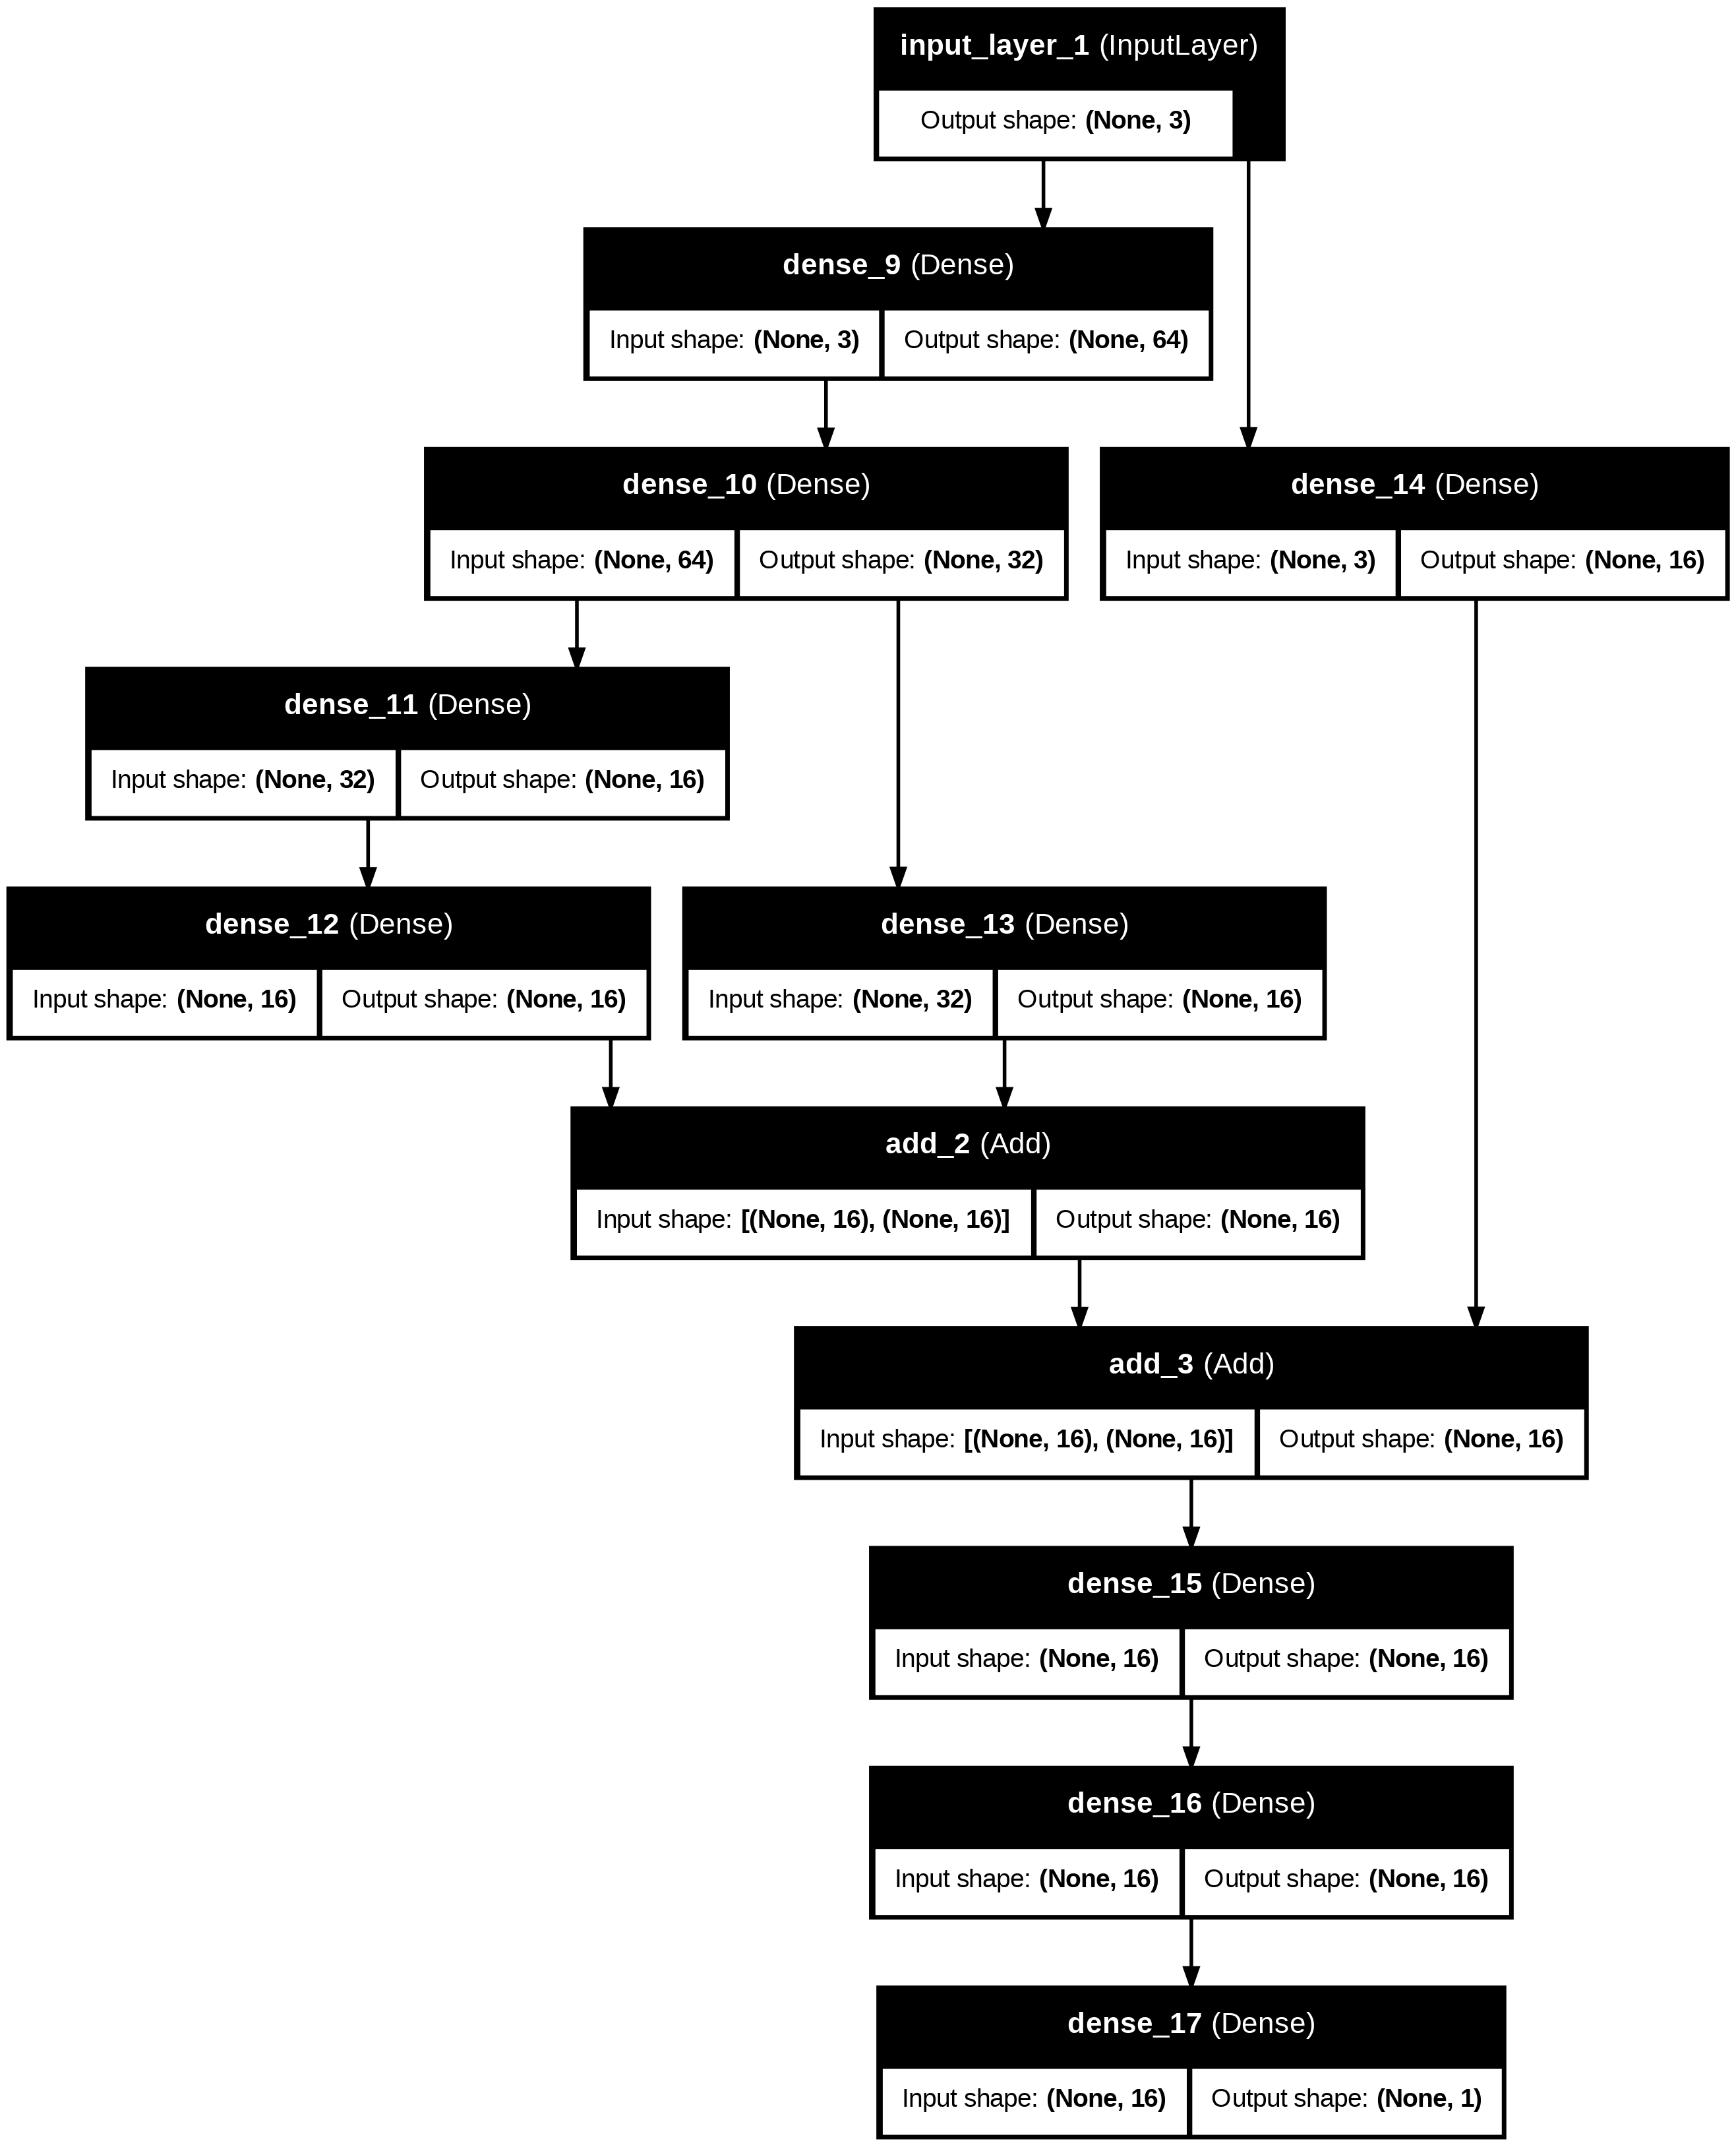

In [48]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [49]:
es = EarlyStopping(monitor='val_accuracy',
                           patience=50,
                           restore_best_weights=True,
                           verbose=1) # early stopping



checkpoint = ModelCheckpoint('best_MLP_model.keras', monitor='val_loss', save_best_only=True)

In [50]:
networkHistory = model.fit(new_metadata_X_train, new_metadata_Y_train,
                    validation_data=(metadata_X_val, metadata_Y_val),
                    epochs=800,
                    batch_size=128,
                    callbacks=[es, checkpoint],
                    verbose=2)

Epoch 1/800
2645/2645 - 14s - 5ms/step - accuracy: 0.9624 - loss: 0.1643 - val_accuracy: 0.9621 - val_loss: 0.1528
Epoch 2/800
2645/2645 - 9s - 4ms/step - accuracy: 0.9625 - loss: 0.1541 - val_accuracy: 0.9625 - val_loss: 0.1434
Epoch 3/800
2645/2645 - 10s - 4ms/step - accuracy: 0.9625 - loss: 0.1332 - val_accuracy: 0.9625 - val_loss: 0.1192
Epoch 4/800
2645/2645 - 9s - 4ms/step - accuracy: 0.9623 - loss: 0.1223 - val_accuracy: 0.9622 - val_loss: 0.1170
Epoch 5/800
2645/2645 - 11s - 4ms/step - accuracy: 0.9621 - loss: 0.1192 - val_accuracy: 0.9625 - val_loss: 0.1152
Epoch 6/800
2645/2645 - 12s - 4ms/step - accuracy: 0.9623 - loss: 0.1152 - val_accuracy: 0.9615 - val_loss: 0.1177
Epoch 7/800
2645/2645 - 11s - 4ms/step - accuracy: 0.9622 - loss: 0.1147 - val_accuracy: 0.9625 - val_loss: 0.1059
Epoch 8/800
2645/2645 - 19s - 7ms/step - accuracy: 0.9623 - loss: 0.1147 - val_accuracy: 0.9623 - val_loss: 0.1499
Epoch 9/800
2645/2645 - 11s - 4ms/step - accuracy: 0.9622 - loss: 0.1128 - val_acc

In [51]:
# evaluate on the validation set
test_loss, test_acc = model.evaluate(metadata_X_test, metadata_Y_test, verbose=1)

1511/1511 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9635 - loss: 0.0970


In [54]:
num_params = model.count_params()

# final results
final_train_loss = networkHistory.history['loss'][-1]

# print the results
print(f"Number of parameters: {num_params}")
print(f"Final training loss: {final_train_loss}")
print(f"Final test loss: {test_loss}")

Number of parameters: 4289
Final training loss: 0.09852340817451477
Final test loss: 0.09592030197381973


1511/1511 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


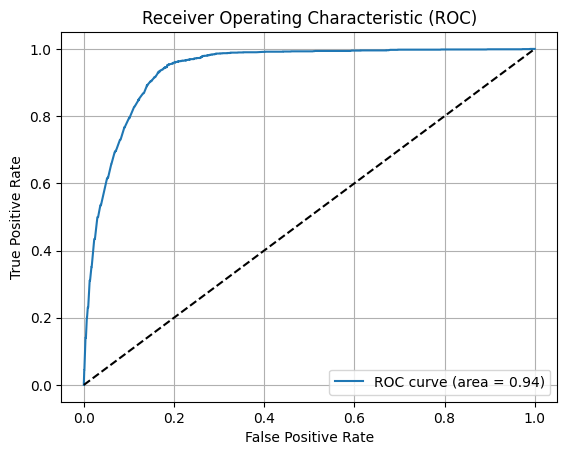

Test AUROC: 0.9391


In [58]:
from sklearn.metrics import roc_curve, auc, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay


y_pred_probs = model.predict(metadata_X_test)  # Probabilities (needed for AUROC)
y_pred_classes = (y_pred_probs > 0.5).astype(int)  # Binary 0/1 predictions

fpr, tpr, thresholds = roc_curve(metadata_Y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Test AUROC: {roc_auc:.4f}")

In [59]:
balanced_acc = balanced_accuracy_score(metadata_Y_test, y_pred_classes)
print(f"Balanced Accuracy: {balanced_acc:.4f}")


Balanced Accuracy: 0.5683


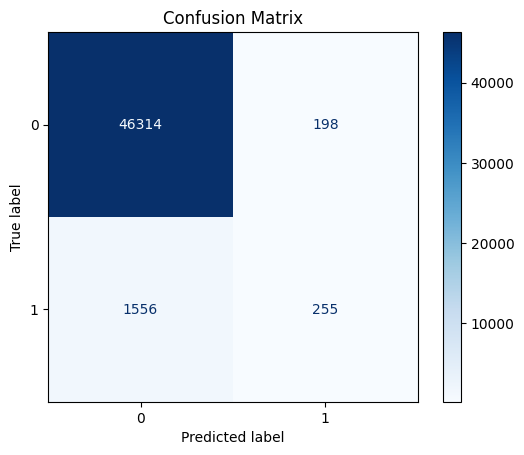

In [60]:
cm = confusion_matrix(metadata_Y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()